# Linear regression 

## Problem statement : predicting employees salary based on expreience
A Company wants to understand how employee expreiece influences salary to desighn a fair and compensation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv("C://Users//sudhin//Downloads//dataset//salary.csv")
salary

,Unnamed: 0,Experience Years,Salary
0,0,1.1,39343
1,1,1.2,42774
2,2,1.3,46205
3,3,1.5,37731
4,4,2.0,43525
5,5,2.2,39891
6,6,2.5,48266
7,7,2.9,56642
8,8,3.0,60150
9,9,3.2,54445


In [3]:
salary = salary.drop(columns ='Unnamed: 0')

In [4]:
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [5]:
salary.duplicated().sum()

np.int64(0)

In [6]:
salary.isna().sum()

Experience Years    0
Salary              0
dtype: int64

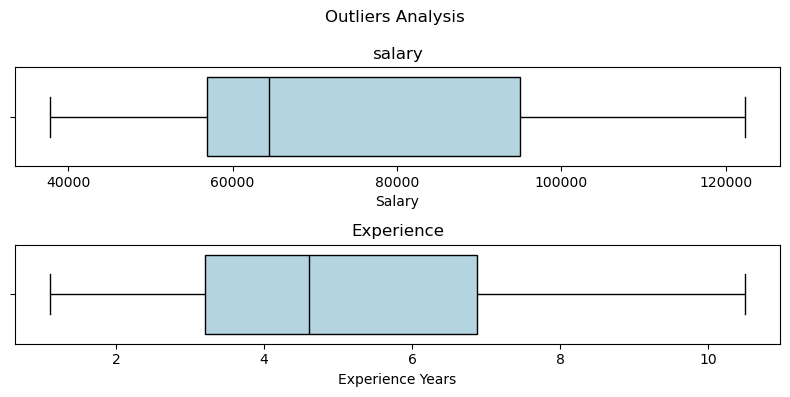

In [7]:
plt.figure(figsize =(8,4))
plt.suptitle("Outliers Analysis")

# fig 1
plt.subplot(2,1,1)
plt.title('salary')
sns.boxplot(x=salary['Salary'] , color ='lightblue' ,linecolor = 'black')

# fig 2
plt.subplot(2,1,2)
plt.title('Experience')
sns.boxplot(x=salary['Experience Years'] ,color ='lightblue' ,linecolor = 'black')

plt.tight_layout()

# EDA

Text(0.5, 1.0, 'Experience Years v/s salary')

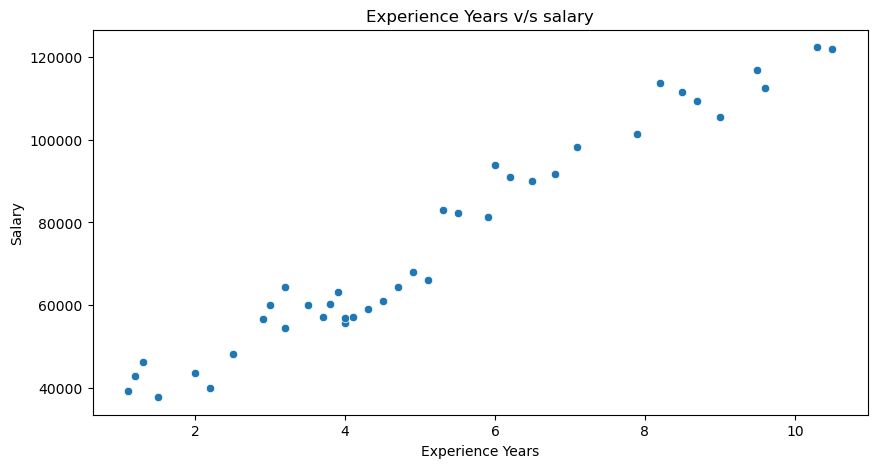

In [8]:
# Experience v/s Salary
plt.figure(figsize = (10,5))
sns.scatterplot(salary ,x = salary['Experience Years'], y= salary['Salary'] )
plt.title('Experience Years v/s salary')

Text(0.5, 1.0, 'Experience Years v/s salary')

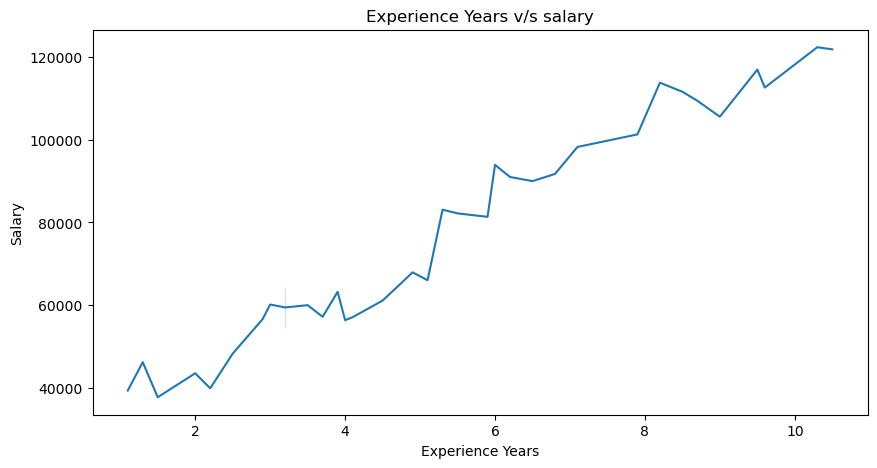

In [9]:
## line plot
# Experience v/s Salary
plt.figure(figsize = (10,5))
# plt.subplot(6,1,1)
sns.lineplot(salary ,x = salary['Experience Years'], y= salary['Salary'] )
plt.title('Experience Years v/s salary')

Text(0.5, 1.0, 'salary distribution')

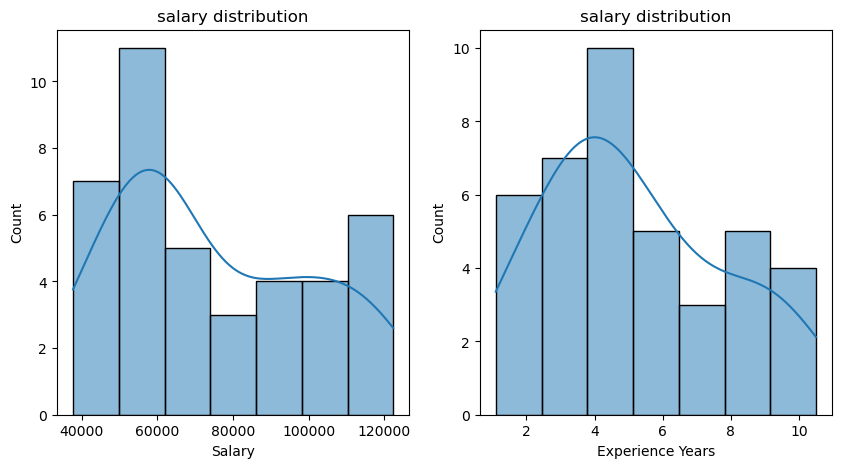

In [10]:
# Experience v/s Salary
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(salary["Salary"],kde = True)
plt.title('salary distribution')

plt.subplot(1,2,2)
sns.histplot(salary["Experience Years"],kde = True)
plt.title('salary distribution')

## Define target (y) and feature (x)


In [11]:
x = salary[['Experience Years']]
y = salary['Salary']


## Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

##

In [14]:
x_train

,Experience Years
39,10.5
6,2.5
25,5.9
9,3.2
13,3.8
31,7.9
34,8.7
8,3.0
17,4.1
24,5.5


In [15]:
x_test

,Experience Years
19,4.5
16,4.0
15,4.0
26,6.0
4,2.0
12,3.7
37,9.6
27,6.2


In [16]:
y_train

39    121872
6      48266
25     81363
9      54445
13     60200
31    101302
34    109431
8      60150
17     57081
24     82200
0      39343
33    111620
5      39891
11     60000
1      42774
29     91738
21     67938
2      46205
30     98273
36    116969
3      37731
35    105582
23     83088
32    113812
10     64445
22     66029
18     59095
20     64500
7      56642
14     63218
28     90000
38    122391
Name: Salary, dtype: int64

In [17]:
y_test

19     61111
16     56957
15     55794
26     93940
4      43525
12     57189
37    112635
27     91000
Name: Salary, dtype: int64

## Model building

In [18]:
##import librarie
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model

LinearRegression()

In [20]:
model.fit(x_train,y_train)


LinearRegression()

In [21]:
model.intercept_

np.float64(26716.250176145535)

In [22]:
model.coef_


array([9408.03127251])

In [23]:
print('intercept (B0)',model.intercept_)
print('Slop (B1)',model.coef_)

intercept (B0) 26716.250176145535
Slop (B1) [9408.03127251]


## predict

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
y_pred = model.predict(x_test)
print("predicted salary  for x_test",y_pred)

predicted salary  for x_test [ 69052.39090243  64348.37526617  64348.37526617  83164.43781119
  45532.31272116  61525.96588442 117033.35039221  85046.04406569]


In [26]:
predicted = pd.DataFrame({"experience":x_test['Experience Years'],'salary':y_pred})
predicted

,experience,salary
19,4.5,69052.390902
16,4.0,64348.375266
15,4.0,64348.375266
26,6.0,83164.437811
4,2.0,45532.312721
12,3.7,61525.965884
37,9.6,117033.350392
27,6.2,85046.044066


Text(0.5, 1.0, 'LINEAR REGRESSION EXAMPLE')

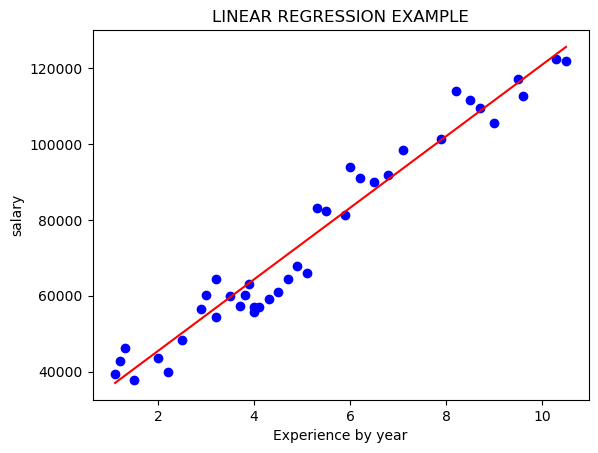

In [27]:
plt.scatter(x,y,color = 'blue')
plt.plot(x ,model.predict(x),color = 'red')
plt.xlabel ('Experience by year')
plt.ylabel('salary')
plt.title('LINEAR REGRESSION EXAMPLE')

## Model accuracy

In [28]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [29]:
mean_absolute_error(y_test , y_pred)

6419.911069460598

In [30]:
mean_absolute_percentage_error(y_test , y_pred)

0.09427261664902292

In [31]:
mean_absolute_percentage_error(y_test , y_pred)*100

9.427261664902293

In [32]:
mean_squared_error(y_test , y_pred)

48077731.16919359

### prediction for new values

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
exp = float(input("enter experience in year"))
prediction = model.predict([[exp]])
print("predicted salary according to given experience :", prediction[0])

enter experience in year 1


predicted salary according to given experience : 36124.28144865212
